<center>Projet sur le traitement et l’analyse des données du recensement général de la population et de l’habitat de 2014 (RGPH2014) du Maroc</center>

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

####  1. Créer le fichier notebook et charger dans un DataFrame (dfcom : DataFrame des communes) le contenu de la première feuille du fichier Excel (RGPH2004_2014_Commune.xlsx)

In [8]:
# 1.Chargement dans un DataFramele premières feuille du fichier excel
dfcom=pd.read_excel('RGPH2014_Commune.xlsx', sheet_name="RGPH2014_data")

In [165]:
# affichage du 5 premiers lignes pour avoir une idée sur le contenu de la data
dfcom.head()

,OBJECTID,nom_region,code_region,nom_province,code_province,nom_cercle,code_cercle,nom_commune,code_commune,nom_centre,...,IPP2004_T,IPM2004_T,DPSP_Educ2,DPSP_sante,DPSP_AEEA2,DPSP_Clog2,DFP_Pmon_u,DFP_Pmul_u,DFP_ND_MM_,TPG2014_T
0,1,Marrakech-Safi,7,Chichaoua,161,Chichaoua,3,Sid LMokhtar,16103113,Sid LMokhtar,...,8.457180,40.777008,62.889022,17.733411,10.804462,8.573106,1.41095,4.68346,0.783039,6.877449
1,2,Marrakech-Safi,7,Marrakech,351,LOUDAYA,5,Ait Imour,35105032,,...,11.511656,41.367142,67.551315,13.375796,4.352441,14.720453,2.79230,7.92297,0.309491,11.024761
2,3,Marrakech-Safi,7,Essaouira,211,TAMANAR,5,Bizdad,21105112,,...,30.337774,45.233658,62.800479,7.151443,15.658388,14.389691,6.07098,21.91380,4.258560,32.243340
3,4,Marrakech-Safi,7,Essaouira,211,TAMANAR,5,Bouzemmour,21105132,,...,45.628159,50.931080,48.984540,4.100492,24.378073,22.536895,6.92833,47.81570,13.225300,67.969330
4,5,Marrakech-Safi,7,Essaouira,211,TAMANAR,5,Ezzaouite,21105152,,...,35.322727,46.790127,56.600684,4.678554,21.244341,17.476416,8.37407,31.93500,7.285920,47.594990


#### 2. Afficher le nombre de lignes et de colonnes de dfcom

In [166]:
# 2.Affichage de nombre de ligne et colonne
print('On a 1689 lignes et 125 colonnes')
dfcom.shape

On a 1689 lignes et 125 colonnes


(1689, 125)

#### 3. Calculer la population municipale totale, la population masculine, la population féminine et le nombre de ménages du Maroc en 2014

In [167]:
# 3.Calculer la population municipale totale, la population masculine, la population féminine et le nombre de ménages du Maroc en 2014
print('la poulation total, masculine, féminine et le nombre de ménages sont par ordre')
dfcom[['pop_t', 'pop_m','pop_f','NbMg_T']].sum()

la poulation total, masculine, féminine et le nombre de ménages sont par ordre


pop_t     33610084
pop_m     16747522
pop_f     16862562
NbMg_T     7313806
dtype: int64

#### 4. Afficher les communes dont la population (pop_t) est égale à zéro

In [168]:
# 4.1 Afficher les communes dont la population (pop_t) est égale à zéro.
print('les communes dont la population (pop_t) est égale à zéro.')
dfcom.loc[dfcom['pop_t']==0,['nom_commune','pop_t']]

les communes dont la population (pop_t) est égale à zéro.


,nom_commune,pop_t
1407,Melilia,0
1451,Sebta,0
1676,Lagouira,0
1682,Zoug,0
1683,Mijik,0
1684,Aghouinite,0


In [9]:
# 4.2 supprimer définitivement les communes oû la valeur egal 0 de dfcom 
index_Names = dfcom[ dfcom['pop_t'] == 0 ].index
dfcom.drop(index_Names , inplace=True)

#### 5.  Ajouter dans dfcom une nouvelle colonne appelée « superficie » et calculer la valeur de cette colonne

In [170]:
# 5.Ajouter dans dfcom une nouvelle colonne appelée « superficie » et calculer la valeur de cette colonne
dfcom['superficie'] = dfcom['pop_t'] / dfcom['densite']  

#### 6. Ajouter la colonne « type_commune » à dfcom et calculer sa valeur à partir de la colonne « code_ac » en se basant sur l'enonce

In [173]:
# 6.Ajouter la colonne « type_commune » à dfcom et calculer sa valeur à partir de la colonne « code_ac » en se basant sur la table de correspondance
conditions = [
    (dfcom['code_ac'] == 1),
    (dfcom['code_ac'] == 2),
    (dfcom['code_ac'] == 3),
    (dfcom['code_ac'] == 4),
    (dfcom['code_ac'] == 5)]

values = ['Urbain', 'Rural', 'Centre urbain', 'Centre urbain', 'Centre_urbain']
dfcom['type_commune'] = np.select(conditions, values)

#### 7. Calculer le nombre de communes rurales ayant un ou plusieurs centres urbains puis calculer le nombre de communes rurales ayant une population supérieure à la population de leur(s) centre(s) urbain(s)

In [457]:
# 7.Calculer le nombre de communes rurales ayant un ou plusieurs centres urbains
print("le nombre de communes rurales ayant un ou plusieurs centres urbains est de")
dfcom[dfcom['type_commune']=='Centre urbain']['nom_commune'].nunique()

le nombre de communes rurales ayant un ou plusieurs centres urbains est de


146

In [72]:
# 7.calculer le nombre de communes rurales ayant une population supérieure à la population de leur(s) centre(s) urbain(s)
print("le nombre de communes rurales dont la pop_t supérieure à la pop_t de leur(s) centre(s) urbain(s) est de :")
sum(dfcom[dfcom['type_commune']== 'Rural']['pop_t']>dfcom[dfcom['type_commune']== 'Centre urbain']['pop_t'].count())

le nombre de communes rurales dont la pop_t supérieure à la pop_t de leur(s) centre(s) urbain(s) est de :


1274

#### 8. Calculer la moyenne et l’écart-type de la population des communes à caractère urbain (communes de type urbain ou centre urbain) et ceux des communes rurales

In [176]:
# 8.1 Calculer la moyenne de la population des communes à caractère urbain (communes de type urbain ou centre urbain) 
print('la moyenne de la population des communes de type centre urbain ou urbain est de :')
round(dfcom[(['type_commune']=='Centre urbain')|(dfcom['type_commune']=='Urbain')]['pop_t'].mean())

la moyenne de la population des communes de type centre urbain ou urbain est de :


75124

In [177]:
# 8.2 Calculer l’écart-type de la population des communes à caractère urbain (communes de type urbain ou centre urbain) 
print('l’écart-type de la population des communes de type centre urbain ou urbain est de :')
round(dfcom[(['type_commune']=='Centre urbain')|(dfcom['type_commune']=='Urbain')]['pop_t'].std())

l’écart-type de la population des communes de type centre urbain ou urbain est de :


97178

In [178]:
# 8.3 Calculer la moyenne de la population des communes à caractère rural 
print('la moyenne de la population des communes de type centre rural est de :')
round(dfcom[dfcom['type_commune']=='Rural']['pop_t'].mean())

la moyenne de la population des communes de type centre rural est de :


10419

In [179]:
# 8.4 Calculer l’écart-type de la population des communes à caractère rural 
print('l’écart-type de la population des communes de type centre rural est de :')
round(dfcom[dfcom['type_commune']=='Rural']['pop_t'].std())

l’écart-type de la population des communes de type centre rural est de :


7624

#### 9. Calculer le nombre de valeurs uniques dans le champ « nom_commune » et Afficher dans un nouveau dataframe (dfcom_duplic) les communes ayant le même nom tout en affichant le nom de leur province

In [180]:
# 9.1 Calculer le nombre de valeurs uniques dans le champ « nom_commune »
print('le nombre de valeurs uniques dans le champ « nom_commune » ',
dfcom['nom_commune'].nunique())

le nombre de valeurs uniques dans le champ « nom_commune »  1533


In [181]:
# 9.Afficher dans un nouveau dataframe (dfcom_duplic) les communes ayant le même nom tout en affichant le nom de leur province
print('les communes ayant le même nom tout en affichant le nom de leur province')
dfcom_duplic=pd.DataFrame(dfcom, columns=['nom_province','nom_commune'])
dfcom_duplic[dfcom_duplic.duplicated(['nom_province','nom_commune'])]

les communes ayant le même nom tout en affichant le nom de leur province


,nom_province,nom_commune
9,Chichaoua,Sid LMokhtar
50,Essaouira,Ounagha
63,Essaouira,Tafetachte
94,Marrakech,Harbil
106,El Kelaa des Sraghna,Assahrij
...,...,...
1577,Chefchaouen,Bab Taza
1579,Al Hoceima,Issaguen
1600,Tétouan,Jbel Lahbib
1612,Sidi Ifni,Mirleft


In [182]:
type(dfcom_duplic)

pandas.core.frame.DataFrame

#### 10. Calculer le nombre de commune dont le nom commence par le terme « Sidi » sans tenir en compte la casse (le terme peut être en minuscule, majuscule ou bien un mélange des deux)

In [643]:
# 10.Calculer le nombre de commune dont le nom commence par le terme « Sidi » sans tenir en compte la casse (le terme peut être en minuscule, majuscule ou bien un mélange des deux)
print('le nombre de commune dont le nom commence par le terme « Sidi » sans tenir en compte la casse est de')
dfcom['nom_commune'].str.upper().str.startswith('SIDI').sum()

le nombre de commune dont le nom commence par le terme « Sidi » sans tenir en compte la casse est de


150

#### 11. Donner le nom de la commune urbaine (code_ac == 1) ayant le taux net d’activité le plus bas et celle ayant le taux net d’activité le plus haut

In [610]:
# 11.Donner le nom de la commune urbaine (code_ac == 1) ayant le taux net d’activité le plus bas et celle ayant le taux net d’activité le plus haut
dfcom[dfcom['ta_t']==dfcom[dfcom["code_ac"] == 1]['ta_t'].min()]['nom_commune']

1092    Ribate El Kheir
Name: nom_commune, dtype: object

#### 12. Calculer le nombre de communes ayant un taux net d’activité inférieur à la moyenne des taux nets d’activité

In [185]:
type_c1.loc[type_c1['ta_t'] == type_c1['ta_t'].max()]['nom_commune']

1675    El Marsa
Name: nom_commune, dtype: object

In [187]:
# 12.Calculer le nombre de communes ayant un taux net d’activité inférieur à la moyenne des taux nets d’activit
print("le nombre de communes ayant un taux d'activité inférieur à la moyenne")
sum(dfcom['ta_t']<dfcom['ta_t'].mean())

le nombre de communes ayant un taux d'activité inférieur à la moyenne


843

#### 13.Reproduire à partir des données dfcom, le graphique

,Urbain,Rural,Total
moins de 15 ans,26.1,31.4,28.2
15-59 ans,64.6,59.0,62.4
60 ans et plus,9.3,9.7,9.4


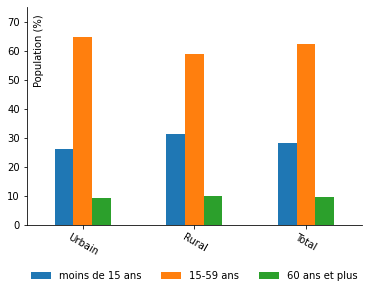

In [461]:
dfcom_moins_15=[round(sum(dfcom[dfcom['type_commune']!='Rural']['mq_t']*dfcom[dfcom['type_commune']!='Rural']['pop_t']/100)/sum(dfcom[dfcom['type_commune']!='Rural']['pop_t'])*100,1),
                round(sum(dfcom[dfcom['type_commune']=='Rural']['mq_t']*dfcom[dfcom['type_commune']=='Rural']['pop_t']/100)/sum(dfcom[dfcom['type_commune']=='Rural']['pop_t'])*100,1),
                round(sum(dfcom['mq_t']*dfcom['pop_t']/100)/sum(dfcom['pop_t'])*100,1)]
dfcom_15_à_59=[round(sum(dfcom[dfcom['type_commune']!='Rural']['qcq_t']*dfcom[dfcom['type_commune']!='Rural']['pop_t']/100)/sum(dfcom[dfcom['type_commune']!='Rural']['pop_t'])*100,1),
               round(sum(dfcom[dfcom['type_commune']=='Rural']['qcq_t']*dfcom[dfcom['type_commune']=='Rural']['pop_t']/100)/sum(dfcom[dfcom['type_commune']=='Rural']['pop_t'])*100,1),
               round(sum(dfcom['qcq_t']*dfcom['pop_t']/100)/sum(dfcom['pop_t'])*100,1)]
dfcom_plus_60=[round(sum(dfcom[dfcom['type_commune']!='Rural']['soix_t']*dfcom[dfcom['type_commune']!='Rural']['pop_t']/100)/sum(dfcom[dfcom['type_commune']!='Rural']['pop_t'])*100,1),
               round(sum(dfcom[dfcom['type_commune']=='Rural']['soix_t']*dfcom[dfcom['type_commune']=='Rural']['pop_t']/100)/sum(dfcom[dfcom['type_commune']=='Rural']['pop_t'])*100,1),
               round(sum(dfcom['soix_t']*dfcom['pop_t']/100)/sum(dfcom['pop_t'])*100,1)]

data = {'moins de 15 ans':dfcom_moins_15,
        '15-59 ans':dfcom_15_à_59, 
        '60 ans et plus':dfcom_plus_60}

dtc = pd.DataFrame(data, index =['Urbain',
                                'Rural',
                                'Total'])
dtc=dtc.transpose()

display(dtc)
dtc = pd.DataFrame({'moins de 15 ans': dfcom_moins_15,
                    '15-59 ans':dfcom_15_à_59,
                    '60 ans et plus':dfcom_plus_60,}, index =['Urbain','Rural', 'Total'])
dtc.style.set_caption("Hello World")


ax=dtc.plot.bar()
ax.set_ylabel('Population (%)',fontsize=10)
ax.yaxis.set_label_coords(0.05, .8)
plt.xticks(rotation=-30)
plt.ylim([0, 75])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=3,frameon= False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#### 14. Représenter graphiquement la répartition des ménages urbains par type d’occupation de logement (villa, maison marocaine, appartement, bidonville, habitation rurale)

la répartition des ménages urbains par type d’occupation de logement (villa, maison marocaine, appartement, bidonville, habitation rurale)


,Urbain
villa,4.4
maison marocaine,16.8
appartement,71.1
bidonvilla,5.2
habitation rurale,1.4


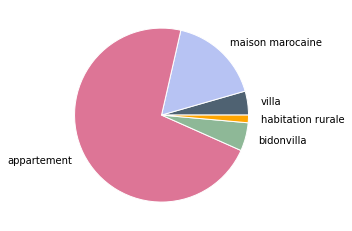

In [190]:
dfcom_uvilla=[round(sum(dfcom[dfcom['type_commune']!='Rural']['villa_u']*dfcom[dfcom['type_commune']!='Rural']['pop_t']/100)/sum(dfcom[dfcom['type_commune']!='Rural']['pop_t'])*100,1)]
dfcom_appa_u=[round(sum(dfcom[dfcom['type_commune']!='Rural']['appa_u']*dfcom[dfcom['type_commune']!='Rural']['pop_t']/100)/sum(dfcom[dfcom['type_commune']!='Rural']['pop_t'])*100,1)]
dfcom_mm_u=[round(sum(dfcom[dfcom['type_commune']!='Rural']['mm_u']*dfcom[dfcom['type_commune']!='Rural']['pop_t']/100)/sum(dfcom[dfcom['type_commune']!='Rural']['pop_t'])*100,1)]
dfcom_som_u=[round(sum(dfcom[dfcom['type_commune']!='Rural']['som_u']*dfcom[dfcom['type_commune']!='Rural']['pop_t']/100)/sum(dfcom[dfcom['type_commune']!='Rural']['pop_t'])*100,1)]
dfcom_rural_u=[round(sum(dfcom[dfcom['type_commune']!='Rural']['rural_u']*dfcom[dfcom['type_commune']!='Rural']['pop_t']/100)/sum(dfcom[dfcom['type_commune']!='Rural']['pop_t'])*100,1)]

print("la répartition des ménages urbains par type d’occupation de logement (villa, maison marocaine, appartement, bidonville, habitation rurale)")
data = {'villa':dfcom_uvilla,
        'maison marocaine':dfcom_appa_u, 
        'appartement':dfcom_mm_u,
        'bidonvilla':dfcom_som_u,
        'habitation rurale':dfcom_rural_u}
 
dtu = pd.DataFrame(data, index =['Urbain'])
dtu=dtu.transpose()
display(dtu)

# create random data
names='villa', 'maison marocaine', 'appartement', 'bidonvilla','habitation rurale'
values=[4.4,16.8,71.1,5.2,1.4]

# Label distance: gives the space between labels and the center of the pie
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#FFA500']
plt.pie(values, labels=names, labeldistance=1.15,wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors);
plt.show();

####  15. Représenter graphiquement le taux net d’activité (ta_t) en fonction du taux d’analphabétisme de la population âgée de 10 ans et plus (anlph_t). Commenter le graphique

representation graphique de taux net d’activité en fonction du taux d’analphabétisme de la population âgée de 10 ans et plus


,ta_t,anlph_t
0,6491.6,5204.4
1,6343.2,6678.4
2,3091.7,4735.8
3,2328.5,3599.2
4,2467.0,3945.9
...,...,...
1681,40.0,20.0
1685,351.2,146.9
1686,58758.7,21500.6
1687,22.1,4.3


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


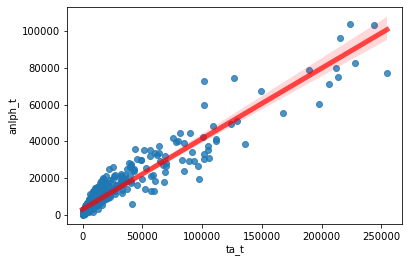

In [191]:
print("representation graphique de taux net d’activité en fonction du taux d’analphabétisme de la population âgée de 10 ans et plus")
anlph_t=round(dfcom['pop_t']*dfcom['anlph_t']/100,1)
ta_t=round(dfcom['pop_t']*dfcom['ta_t']/100,1)


data = {'ta_t':ta_t,
        'anlph_t':anlph_t}
 
dtt = pd.DataFrame(data)

display(dtt)
sns.regplot(dtt["ta_t"], dtt["anlph_t"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()
### on voie que le taux

#### 16. D’après les données représentées dans dfcom, quels sont les facteurs explicatifs du taux de pauvreté globale. Est-ce que ces facteurs sont les mêmes en milieu urbain et en milieu rural ?

In [463]:
# Les facteurs explicatifs du taux de pauvreté globale
d_corr=dfcom.corr()
threshold=0.8
haut_corr=abs(d_corr['TPG2014_T'])
result=haut_corr[haut_corr>0.8]
result

TPMulti201    0.953661
IPP2014_T     0.946647
IPP2004_T     0.810343
DFP_Pmul_u    0.895435
DFP_ND_MM_    0.837535
TPG2014_T     1.000000
Name: TPG2014_T, dtype: float64

In [193]:
# 16.2 Est-ce que ces facteurs sont les mêmes en milieu urbain et en milieu rural ?
# la correltaion entre "TPG2014_T" et les autres varibales dans le mlieu Urbain
corr_ur=dfcom[dfcom['type_commune']!='Rural'].corr()['TPG2014_T'][:]
Threshold=0.8
haut_cru=corr_ur[corr_ur>0.8]
haut_cru

pauv2014_T    0.964360
volum_T       0.951003
sev_T         0.923734
vul_T         0.844052
DFP_Pmon_u    0.950484
TPG2014_T     1.000000
Name: TPG2014_T, dtype: float64

In [194]:
# la correltaion entre "TPG2014_T" et les autres varibales dans le mlieu Rural
corr_ru=dfcom[dfcom['type_commune']=='Rural'].corr()['TPG2014_T'][:]
Threshold=0.8
haut_cru=corr_ru[corr_ru>0.8]
haut_cru

TPMulti201    0.948155
IPP2014_T     0.942192
DFP_Pmul_u    0.867144
DFP_ND_MM_    0.833718
TPG2014_T     1.000000
Name: TPG2014_T, dtype: float64

In [ ]:
# les variables qui impact directement le taux de pauvreté dans le milieu rural sont dirrerents que celles du mulieu urbain on a 
pour le milieu Urbian les facteurs suivants
            pauv2014_T   =  Taux de pauvreté monétaire (Total)
            volum_T       0.951003
            sev_T         0.923734
            vul_T         0.844052
            DFP_Pmon_u    0.950484

#### 17. Générer un nouveau DataFrame (DataFrame des Provinces : dfprov)

In [464]:
# definir les colonnes puis gnérer les données
dfprov = dfcom[['code_province','nom_province','pop_t','pop_m','pop_f','NbMg_T','eau_t','elec_t']].copy()
dfprov['nb_com_u'] = dfcom['type_commune']!= 'Rural'
dfprov['nb_com_r'] = dfcom['type_commune']== 'Rural'
dfprov['nb_com_u'] = dfprov['nb_com_u'].astype(int)
dfprov['nb_com_r'] = dfprov['nb_com_r'].astype(int)
dfprov['pop_u']=dfcom[dfcom['type_commune']!='Rural']['pop_t']
dfprov['pop_r']=dfcom[dfcom['type_commune']=='Rural']['pop_t']
dfprov['NbMg_U']=dfcom[dfcom['type_commune']!='Rural']['NbMg_T']
dfprov['NbMg_R']=dfcom[dfcom['type_commune']=='Rural']['NbMg_T']
dfprov

,code_province,nom_province,pop_t,pop_m,pop_f,NbMg_T,eau_t,elec_t,nb_com_u,nb_com_r,pop_u,pop_r,NbMg_U,NbMg_R
0,161,Chichaoua,13537,6586,6951,3042,91.381579,91.019737,1,0,13537.0,NaN,3042.0,NaN
1,351,Marrakech,14544,7525,7019,2767,91.507047,95.627033,0,1,NaN,14544.0,NaN,2767.0
2,211,Essaouira,7890,3845,4045,1604,71.134663,81.608479,0,1,NaN,7890.0,NaN,1604.0
3,211,Essaouira,5860,2834,3026,1066,0.000000,57.973734,0,1,NaN,5860.0,NaN,1066.0
4,211,Essaouira,6341,3046,3295,1220,54.426230,67.540984,0,1,NaN,6341.0,NaN,1220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,66,Aousserd,40,40,0,14,16.666667,41.666667,0,1,NaN,40.0,NaN,14.0
1685,66,Aousserd,424,316,108,154,22.137405,90.076336,0,1,NaN,424.0,NaN,154.0
1686,391,Oued-Ed-Dahab,102098,55164,46934,25469,94.779432,94.363044,1,0,102098.0,NaN,25469.0,NaN
1687,391,Oued-Ed-Dahab,32,24,8,18,0.000000,0.000000,0,1,NaN,32.0,NaN,18.0


In [465]:
# agregation par code de province
dfprov.groupby('code_province')
by_code_province=dfprov.groupby('code_province')
by_code_province.sum()

,pop_t,pop_m,pop_f,NbMg_T,eau_t,elec_t,nb_com_u,nb_com_r,pop_u,pop_r,NbMg_U,NbMg_R
code_province,,,,,,,,,,,,
1,598757,301264,297493,143752,788.087046,1310.755672,3,12,506517.0,92240.0,124107.0,19645.0
41,571999,291795,280204,111627,3601.092779,4204.858609,8,37,84205.0,487794.0,18845.0,92782.0
51,397708,198506,199202,79326,1234.950694,3658.065471,9,31,135840.0,261868.0,32010.0,47316.0
61,827479,408004,419475,192654,1725.360463,2353.317581,12,15,684484.0,142995.0,164167.0,28487.0
66,2396,1836,560,776,92.777582,190.683400,0,3,0.0,2396.0,0.0,776.0
...,...,...,...,...,...,...,...,...,...,...,...,...
577,321184,158603,162581,49990,2143.690487,2353.929934,4,22,75007.0,246177.0,14041.0,35949.0
581,205182,95875,109307,51142,1372.313811,2349.779236,2,23,80400.0,124782.0,20191.0,30951.0
585,251943,128372,123571,45030,346.076510,1101.872526,4,9,100883.0,151060.0,21518.0,23512.0


#### générer un nouveau DataFrame (DataFrame des Régions : dfreg) qui donne les mêmes informations indiquées ci-dessus en remplaçant l’agrégat province par région (agrégation par code_region)

In [466]:
# remplaçant le code de province par code de la region
dfreg=dfprov
dfreg['code_province'] = dfcom['code_region']
dfreg.rename( columns={'code_province':'code_region'} ,inplace=True)
dfreg

,code_region,nom_province,pop_t,pop_m,pop_f,NbMg_T,eau_t,elec_t,nb_com_u,nb_com_r,pop_u,pop_r,NbMg_U,NbMg_R
0,7,Chichaoua,13537,6586,6951,3042,91.381579,91.019737,1,0,13537.0,NaN,3042.0,NaN
1,7,Marrakech,14544,7525,7019,2767,91.507047,95.627033,0,1,NaN,14544.0,NaN,2767.0
2,7,Essaouira,7890,3845,4045,1604,71.134663,81.608479,0,1,NaN,7890.0,NaN,1604.0
3,7,Essaouira,5860,2834,3026,1066,0.000000,57.973734,0,1,NaN,5860.0,NaN,1066.0
4,7,Essaouira,6341,3046,3295,1220,54.426230,67.540984,0,1,NaN,6341.0,NaN,1220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,12,Aousserd,40,40,0,14,16.666667,41.666667,0,1,NaN,40.0,NaN,14.0
1685,12,Aousserd,424,316,108,154,22.137405,90.076336,0,1,NaN,424.0,NaN,154.0
1686,12,Oued-Ed-Dahab,102098,55164,46934,25469,94.779432,94.363044,1,0,102098.0,NaN,25469.0,NaN
1687,12,Oued-Ed-Dahab,32,24,8,18,0.000000,0.000000,0,1,NaN,32.0,NaN,18.0


In [584]:
# agregation par code _region
dfprov.groupby('code_region')
by_code_region=dfprov.groupby('code_region')
dfreg=by_code_region.sum()
dfreg

,pop_t,pop_m,pop_f,NbMg_T,eau_t,elec_t,nb_com_u,nb_com_r,pop_u,pop_r,NbMg_U,NbMg_R
code_region,,,,,,,,,,,,
1,3540012,1795813,1744199,799124,4740.377791,14942.332928,37,129,2120666.0,1419346.0,525168.0,273956.0
2,2302182,1141574,1160608,494530,5955.947281,10958.531789,43,96,1504517.0,797665.0,338419.0,156111.0
3,4216957,2088237,2128720,919497,9657.239579,19316.404954,65,161,2549791.0,1667166.0,600113.0,319384.0
4,4552585,2262836,2289749,1015107,5687.297054,11278.417035,46,91,3172955.0,1379630.0,766852.0,248255.0
5,2512375,1236817,1275558,520174,7652.709982,11652.997545,38,119,1233846.0,1278529.0,287268.0,232906.0
6,6826773,3414102,3412671,1559404,6748.428670,16298.057058,58,124,5022475.0,1804298.0,1214427.0,344977.0
7,4504767,2267818,2236949,928120,15535.340164,24078.518361,47,228,1928525.0,2576242.0,444856.0,483264.0
8,1627269,796405,830864,277998,10207.204027,12110.369184,26,109,555461.0,1071808.0,114631.0,163367.0
9,2657906,1300313,1357593,601511,11831.561576,16304.803950,28,154,1493198.0,1164708.0,353802.0,247709.0


#### 18.En faisant le webscraping du site web (http://cartesanitaire.sante.gov.ma) ajouter à dfreg, les informations suivantes (données par région) 

In [406]:
import requests 
from bs4 import BeautifulSoup
url = "http://cartesanitaire.sante.gov.ma/ftnrd?p_idniveau=4&p_idreg=6"
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
res

<Response [200]>

In [407]:
tables = soup.find_all("table")  # returns a list of tables
print(f'Total tables: {len(tables)}')
dfh=tables

Total tables: 18


#### 18.1 le webscraping du site web (http://cartesanitaire.sante.gov.ma) 

In [507]:
# copie html dans un editeur de text pour cerner les position de chaque table pouis generer les avec une loup
col_names=["region_name",
           "hosp_nbr","bed_nbr",
           "func_bed_nbr","hémo_center_nbr",
           "urg_bed_nbr","clinic_nbr",
           "offic_nbr","cab_nbr",
           "gen_med_nbr","spec_med_nbr",
           "phar_med_nbr",
           "chir_med_nbr","cor_med_nbr"]
dfm_reg=pd.DataFrame(columns=col_names)


for i in range(1,13):
    # get the url :
    url = f"http://cartesanitaire.sante.gov.ma/ftnrd?p_idniveau=4&p_idreg={i}"
    req = requests.get(url)
    soup = BeautifulSoup(req.text, 'html.parser')
    #region name
    region_name=soup.find("span",{"id":"lblRegion"}).text.split(":")[1].strip()
    #Nbr d’hôpitaux et nbr de lits existants et nbr de lits fonctionnels
    hosp_table=soup.find_all("table",{"class":"table table-bordered"})[4]
    for hosp in hosp_table.find_all("tbody"):
        rows=hosp.find_all("tr")
        hosp_nbr=rows[-1].find_all("td",{"style":"text-align: center"})[0].text
        bed_nbr=rows[-1].find_all("td",{"style":"text-align: center"})[1].text
        func_bed_nbr=rows[-1].find_all("td",{"style":"text-align: center"})[2].text
    # nbr centres d’hémodialyse
    hémo_center=soup.find_all("table",{"class":"table table-bordered"})[5]
    for center in hémo_center.find_all("tbody"):
        rows=center.find_all("tr")
        hémo_center_nbr=rows[0].find("td",{"style":"text-align: center"}).text
    # nbr lit d’urgence
    urg_bed=soup.find_all("table",{"class":"table table-bordered"})[9]
    for urg in urg_bed.find_all("tbody"):
        rows=urg.find_all("tr")
        urg_bed_nbr=rows[-1].find_all("td",{"style":"text-align: center"})[1].text
    # nbr cliniques, officines de pharmacie et laboratoire
    clin_table=soup.find_all("table",{"class":"table table-bordered"})[12]
    for clin in clin_table.find_all("tbody"):
        rows=clin.find_all("tr")
        clinic_nbr=rows[0].find("td",{"style":"text-align: center"}).text
        offic_nbr=rows[4].find("td",{"style":"text-align: center"}).text
        cab_nbr=rows[3].find("td",{"style":"text-align: center"}).text
    # med generalistes, specialiste, phamacistes, chirurgien dentistes, et corps médical
    med_table=soup.find_all("table",{"class":"table table-bordered"})[14]
    for med in med_table.find_all("tbody"):
        rows=med.find_all("tr")
        gen_med_nbr=rows[0].find_all("td", {"style":"text-align: center;font-weight:bold"})[1].text
        spec_med_nbr=rows[1].find_all("td", {"style":"text-align: center;font-weight:bold"})[1].text
        phar_med_nbr=rows[3].find_all("td", {"style":"text-align: center;font-weight:bold"})[1].text
        chir_med_nbr=rows[4].find_all("td", {"style":"text-align: center;font-weight:bold"})[1].text
        cor_med_nbr=rows[9].find_all("td", {"style":"text-align: center;font-weight:bold"})[-1].text

    health_list=[region_name, 
                 hosp_nbr, bed_nbr, 
                 func_bed_nbr, hémo_center_nbr, 
                 urg_bed_nbr, clinic_nbr, offic_nbr, 
                 cab_nbr, gen_med_nbr, spec_med_nbr, 
                 phar_med_nbr, chir_med_nbr , cor_med_nbr]
    # Transformer les chiffre extrait du site en int()
    for i in range(len(health_list[i])):
        try:
            health_list[i]=int(health_list[i])
        except :
            pass
    dfm_reg.loc[len(dfm_reg)]=health_list
dfm_reg

,region_name,hosp_nbr,bed_nbr,func_bed_nbr,hémo_center_nbr,urg_bed_nbr,clinic_nbr,offic_nbr,cab_nbr,gen_med_nbr,spec_med_nbr,phar_med_nbr,chir_med_nbr,cor_med_nbr
0,Tanger-Tetouan-Al Hoceima,20,2119,2107,15,102,30,752,51,369,433,33,17,3066
1,Oriental,15,2352,2276,12,90,25,860,42,290,836,17,10,3125
2,Fès-Meknès,21,3358,3095,9,157,40,1076,65,453,1214,43,15,4557
3,Rabat-Salé-Kénitra,19,3978,3711,14,282,62,1457,93,552,1011,76,37,5304
4,Béni Mellal-Khénifra,12,1677,1387,9,67,26,602,24,268,295,16,10,2071
5,Casablanca-Settat,27,5787,5185,23,133,118,2388,236,701,2359,67,44,5186
6,Marrakech-Safi,17,3685,3003,12,57,46,975,29,473,1357,26,20,4474
7,Drâa-Tafilalet,11,1320,1044,9,48,4,193,5,147,214,12,5,1658
8,Souss-Massa,9,1552,1507,9,50,23,645,31,239,314,17,9,2306
9,Guelmim-Oued Noun,5,375,357,4,21,1,101,2,65,125,7,3,940


In [549]:
for i in range(len(health_list[i])):
    try:
        health_list[i]=int(health_list[i])
    except :
        pass
    dfm_reg.loc[len(dfm_reg)]=health_list


#### 18.2 ajouter à dfreg, les informations suivantes (données par région) :

In [585]:
# changer l'index du dfm_reg pour qu'on puisse concatener respectivement les colonnes
dfm_reg.index = np.arange(1, len(dfm_reg)+1)
frames = [dfreg, dfm_reg]
dfreg = pd.concat(frames, axis=1)

In [587]:
dfreg["hosp_nbr"] = dfreg["hosp_nbr"].astype(int)
dfreg["bed_nbr"] = dfreg["bed_nbr"].astype(int)
dfreg["func_bed_nbr"] = dfreg["func_bed_nbr"].astype(int)
dfreg["urg_bed_nbr"] = dfreg["urg_bed_nbr"].astype(int)
dfreg["clinic_nbr"] = dfreg["clinic_nbr"].astype(int)
dfreg["offic_nbr"] = dfreg["offic_nbr"].astype(int)
dfreg["cab_nbr"] = dfreg["cab_nbr"].astype(int)
dfreg["gen_med_nbr"] = dfreg["gen_med_nbr"].astype(int)
dfreg["spec_med_nbr"] = dfreg["spec_med_nbr"].astype(int)
dfreg["phar_med_nbr"] = dfreg["phar_med_nbr"].astype(int)
dfreg["chir_med_nbr"] = dfreg["chir_med_nbr"].astype(int)
dfreg["cor_med_nbr"] = dfreg["cor_med_nbr"].astype(int)
dfreg

,pop_t,pop_m,pop_f,NbMg_T,eau_t,elec_t,nb_com_u,nb_com_r,pop_u,pop_r,...,hémo_center_nbr,urg_bed_nbr,clinic_nbr,offic_nbr,cab_nbr,gen_med_nbr,spec_med_nbr,phar_med_nbr,chir_med_nbr,cor_med_nbr
1,3540012,1795813,1744199,799124,4740.377791,14942.332928,37,129,2120666.0,1419346.0,...,15,102,30,752,51,369,433,33,17,3066
2,2302182,1141574,1160608,494530,5955.947281,10958.531789,43,96,1504517.0,797665.0,...,12,90,25,860,42,290,836,17,10,3125
3,4216957,2088237,2128720,919497,9657.239579,19316.404954,65,161,2549791.0,1667166.0,...,9,157,40,1076,65,453,1214,43,15,4557
4,4552585,2262836,2289749,1015107,5687.297054,11278.417035,46,91,3172955.0,1379630.0,...,14,282,62,1457,93,552,1011,76,37,5304
5,2512375,1236817,1275558,520174,7652.709982,11652.997545,38,119,1233846.0,1278529.0,...,9,67,26,602,24,268,295,16,10,2071
6,6826773,3414102,3412671,1559404,6748.428670,16298.057058,58,124,5022475.0,1804298.0,...,23,133,118,2388,236,701,2359,67,44,5186
7,4504767,2267818,2236949,928120,15535.340164,24078.518361,47,228,1928525.0,2576242.0,...,12,57,46,975,29,473,1357,26,20,4474
8,1627269,796405,830864,277998,10207.204027,12110.369184,26,109,555461.0,1071808.0,...,9,48,4,193,5,147,214,12,5,1658
9,2657906,1300313,1357593,601511,11831.561576,16304.803950,28,154,1493198.0,1164708.0,...,9,50,23,645,31,239,314,17,9,2306
10,414489,201862,212627,90202,3054.504658,4358.552301,10,45,270419.0,144070.0,...,4,21,1,101,2,65,125,7,3,940


In [594]:
#extraire les nome des colonnes pour repositionner la colonne nom de la region 
print(dfreg.columns)

Index(['pop_t', 'pop_m', 'pop_f', 'NbMg_T', 'eau_t', 'elec_t', 'nb_com_u',
       'nb_com_r', 'pop_u', 'pop_r', 'NbMg_U', 'NbMg_R', 'region_name',
       'hosp_nbr', 'bed_nbr', 'func_bed_nbr', 'hémo_center_nbr', 'urg_bed_nbr',
       'clinic_nbr', 'offic_nbr', 'cab_nbr', 'gen_med_nbr', 'spec_med_nbr',
       'phar_med_nbr', 'chir_med_nbr', 'cor_med_nbr'],
      dtype='object')


In [511]:
# chnager l'order des colonnes defini la colonne region_name en premier
dfreg=dfreg[['region_name','pop_t', 'pop_m', 'pop_f', 'NbMg_T', 'eau_t', 'elec_t', 'nb_com_u',
       'nb_com_r', 'pop_u', 'pop_r', 'NbMg_U', 'NbMg_R',
       'hosp_nbr', 'bed_nbr', 'func_bed_nbr', 'hémo_center_nbr', 'urg_bed_nbr',
       'clinic_nbr', 'offic_nbr', 'cab_nbr', 'gen_med_nbr', 'spec_med_nbr',
       'phar_med_nbr', 'chir_med_nbr', 'cor_med_nbr']]
dfreg

,region_name,pop_t,pop_m,pop_f,NbMg_T,eau_t,elec_t,nb_com_u,nb_com_r,pop_u,...,hémo_center_nbr,urg_bed_nbr,clinic_nbr,offic_nbr,cab_nbr,gen_med_nbr,spec_med_nbr,phar_med_nbr,chir_med_nbr,cor_med_nbr
1,Tanger-Tetouan-Al Hoceima,3540012,1795813,1744199,799124,4740.377791,14942.332928,37,129,2120666.0,...,15,102,30,752,51,369,433,33,17,3066
2,Oriental,2302182,1141574,1160608,494530,5955.947281,10958.531789,43,96,1504517.0,...,12,90,25,860,42,290,836,17,10,3125
3,Fès-Meknès,4216957,2088237,2128720,919497,9657.239579,19316.404954,65,161,2549791.0,...,9,157,40,1076,65,453,1214,43,15,4557
4,Rabat-Salé-Kénitra,4552585,2262836,2289749,1015107,5687.297054,11278.417035,46,91,3172955.0,...,14,282,62,1457,93,552,1011,76,37,5304
5,Béni Mellal-Khénifra,2512375,1236817,1275558,520174,7652.709982,11652.997545,38,119,1233846.0,...,9,67,26,602,24,268,295,16,10,2071
6,Casablanca-Settat,6826773,3414102,3412671,1559404,6748.428670,16298.057058,58,124,5022475.0,...,23,133,118,2388,236,701,2359,67,44,5186
7,Marrakech-Safi,4504767,2267818,2236949,928120,15535.340164,24078.518361,47,228,1928525.0,...,12,57,46,975,29,473,1357,26,20,4474
8,Drâa-Tafilalet,1627269,796405,830864,277998,10207.204027,12110.369184,26,109,555461.0,...,9,48,4,193,5,147,214,12,5,1658
9,Souss-Massa,2657906,1300313,1357593,601511,11831.561576,16304.803950,28,154,1493198.0,...,9,50,23,645,31,239,314,17,9,2306
10,Guelmim-Oued Noun,414489,201862,212627,90202,3054.504658,4358.552301,10,45,270419.0,...,4,21,1,101,2,65,125,7,3,940


#### 19. Analyser en s’appuyant sur des graphiques, la relation entre les offres de soins et les caractéristiques démographiques des régions

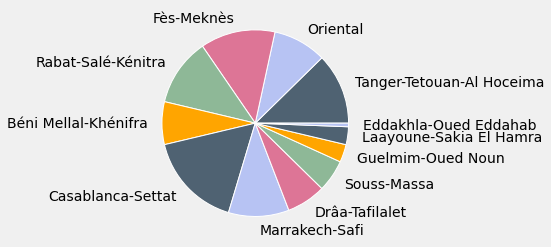

In [600]:
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#FFA500',]
plt.pie(data=dfreg, labels='region_name',x='hosp_nbr', labeldistance=1.15,wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors);
plt.show();

<AxesSubplot:xlabel='region_name'>

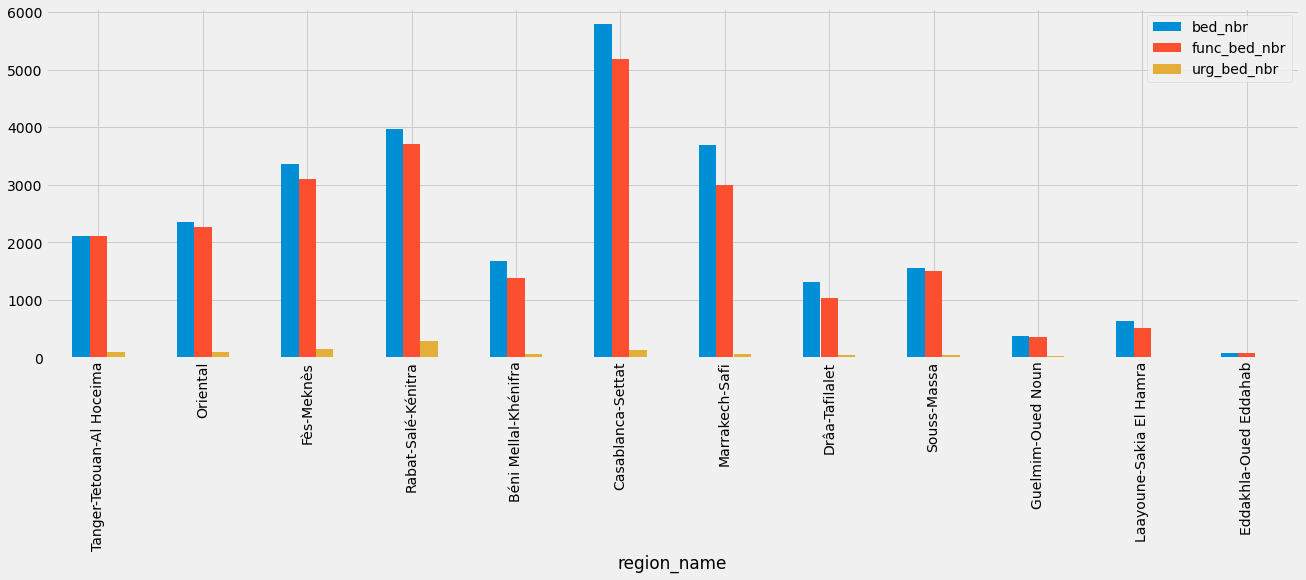

In [625]:
dfreg.plot.bar(x='region_name', y=['bed_nbr','func_bed_nbr','urg_bed_nbr'], figsize=(20,6))

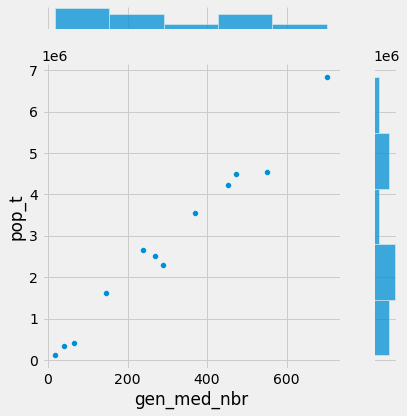

In [633]:
sns.jointplot(x='gen_med_nbr',y='pop_t',data=dfreg,kind='scatter',height=6,
    ratio=6,
    space=1.5)

<AxesSubplot:xlabel='region_name'>

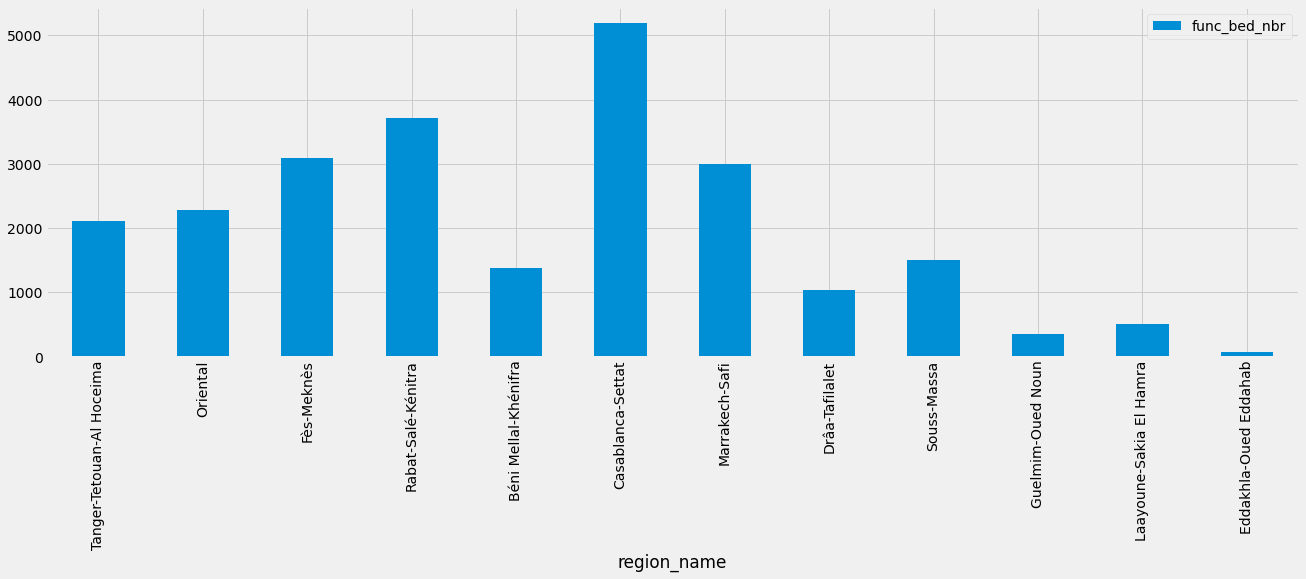

In [589]:
dfreg.plot.bar(x='region_name',y='func_bed_nbr', figsize=(20,6))

#### 20. Exporter les DataFrames « dfprov » et « dfreg » vers le fichier Excel (« resultats_votre- nom.xlsx » en les mettant sur deux feuilles différentes (Attention ! : Deux feuilles du même fichier Excel)

In [618]:
# Exporter le dataframe dfprov vers le fichier excel "data/poprov.xlsx" --> méthode to_excel()
dfprov.to_excel(r'data\resultat_CHAJIA_ABDELHADI_et_EL-IDRRISSI_MUSTAPHA.xlsx')

In [617]:
dfreg.to_excel(r'data\resultat_CHAJIA_ABDELHADI_et_EL-IDRRISSI_MUSTAPHA.xlsx')